# General cleaning of kc_house_data.csv

In [1]:
#import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import scipy.stats as scs
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold

import seaborn as sns
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

***
## Import dataframe from csv file using pd.read_csv function

In [2]:
#importing cvs file and saving it under a variable
kc_house_df = pd.read_csv('./data/kc_house_data.csv')

***
## Review kc_house_data
Info obtained from https://www.kaggle.com/harlfoxem/housesalesprediction about dataset:

"This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015."

In [3]:
kc_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
kc_house_df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [5]:
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

***
## Build first model

In [7]:
#build some functions 
def build_sm_ols(df, features_to_use, target, add_constant=False, show_summary=True):
    X = df[features_to_use]
    if add_constant:
        X = sm.add_constant(X)
    y = df[target]
    ols = sm.OLS(y, X).fit()
    if show_summary:
        print(ols.summary())
    return ols

def check_residuals_normal():
    
def check_feat_target_linearity():
    
def check_residuals_homosked():
    
def check_multicoll():
    
def check_model(df, features_to_use, target_col, add_constant=False, show_summary=False)

In [8]:
target = 'price'
columns_to_use = ['bedrooms', 'condition']

In [10]:
ols = build_sm_ols(df=kc_house_df, columns_to_use=columns_to_use, target=target)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.714
Model:                            OLS   Adj. R-squared (uncentered):              0.714
Method:                 Least Squares   F-statistic:                          2.695e+04
Date:                Tue, 13 Oct 2020   Prob (F-statistic):                        0.00
Time:                        18:17:40   Log-Likelihood:                     -3.0631e+05
No. Observations:               21597   AIC:                                  6.126e+05
Df Residuals:                   21595   BIC:                                  6.126e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

***
## Check count of columns of interest
Doing this helps answer important questions about the data such as: "What scale do the 'grade' and 'condition' columns range from?" or 'How many homes have more than 4 bedrooms?"

In [6]:
kc_house_df['condition'].value_counts() 

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

*We now know that the condition ratings of the houses range from 1-5*

In [7]:
kc_house_df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

*We now know that the grade ratings of the houses range from 1-13*

**I obtained a [pdf](https://www.kingcounty.gov/depts/assessor/Reports/area-reports/2017/residential-westcentral/~/media/depts/assessor/documents/AreaReports/2017/Residential/013.ashx) from the King County website that explains the condition and grade ratings. Below is a screenshot of the rating information:**

<div>
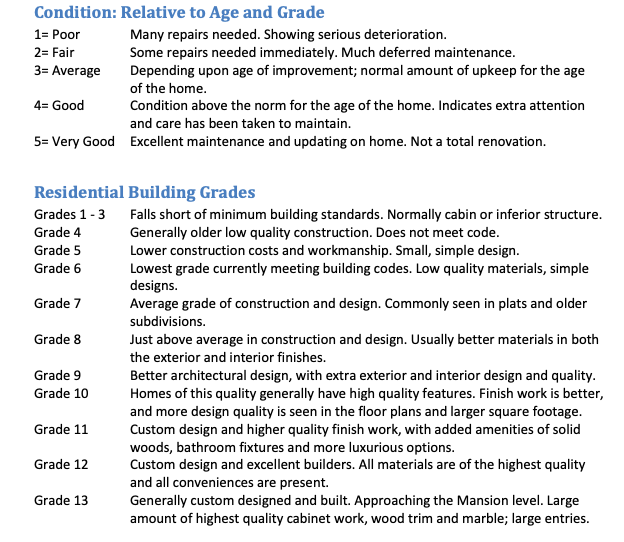
</div>

In [8]:
kc_house_df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [9]:
# One house has 33 bedrooms. But the sqft is low so I will eliminate that outlier
kc_house_df = kc_house_df.drop(15856, axis = 0)

In [10]:
kc_house_df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [13]:
kc_house_df['waterfront'].value_counts()

0.0    19074
1.0      146
Name: waterfront, dtype: int64

***
## Check for duplicates and delete if any

In [15]:
kc_house_df[kc_house_df.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [16]:
print(kc_house_df.shape)
print(len(kc_house_df['id'].unique()))

(21596, 21)
21419


There appear to be some duplicates in the 'id' column. Let's deal with them.

In [18]:
id_dups_series = kc_house_df.duplicated(subset=['id'], keep = False)
id_dups = kc_house_df[id_dups_series]
kc_house_df.drop_duplicates(subset=['id'], keep='last', inplace=True)

In [19]:
print(kc_house_df.shape)
print(len(kc_house_df['id'].unique()))

(21419, 21)
21419


***
## Dealing with Nan values and converting column data types to appropriate data types
Dealing with Nan values depends on the information you want to use. If the columns you would like to use have Nan values, then you must deal with them. If not then you can just create a new dataframe with the columns you would like to use. However I like to get rid of the Nan values so thats what I will do.

In [20]:
# The 'date' column is an object so we should convert it to a datetime64[ns]
kc_house_df['date'] = kc_house_df['date'].astype('datetime64[ns]')

In [21]:
# Checking to see if conversion was successful
print(kc_house_df['date'].dtypes)


datetime64[ns]


In [22]:
# Check for Nan values in the columns
kc_house_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3813
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [23]:
# Remove Nan rows from dataframe if they make up less than 1% of the data
kc_house_df = kc_house_df.dropna(subset=['view', 'waterfront'])

In [24]:
# Checking value counts for columns with Nan values
kc_house_df['waterfront'].value_counts()


0.0    18864
1.0      145
Name: waterfront, dtype: int64

In [25]:
kc_house_df['yr_renovated'].value_counts()

0.0       14987
2014.0       64
2013.0       29
2005.0       27
2000.0       25
          ...  
1953.0        1
1950.0        1
1954.0        1
1959.0        1
1971.0        1
Name: yr_renovated, Length: 70, dtype: int64

We can see that there is an extraneous value of 0.0 that is being used as a placeholder. This could mean the following:
* 0.0 means that the house was never renovated
* 0.0 means that the house renovation history is not known

I do not plan on using 'waterfront' or 'yr_renovated' columns for my project so I will just leave them as is.

In [26]:
# Making sure 'view' Nan values were deleted
kc_house_df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3374
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

***
## Investigating columns
Here, I will be investiagting columns a bit deeper so I can better understand them and answer my questions.

In [27]:
kc_house_df['bedrooms'].describe()

count    19009.000000
mean         3.373823
std          0.903126
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

In [28]:
kc_house_df['bathrooms'].describe()

count    19009.000000
mean         2.119614
std          0.769111
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [29]:
kc_house_df['condition'].describe()

count    19009.000000
mean         3.410805
std          0.649925
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

In [30]:
kc_house_df['grade'].describe()

count    19009.000000
mean         7.665159
std          1.174481
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [31]:
kc_house_df['sqft_living'].describe()

count    19009.000000
mean      2084.755747
std        922.595214
min        370.000000
25%       1430.000000
50%       1920.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

In [32]:
kc_house_df['sqft_lot'].describe()

count    1.900900e+04
mean     1.509645e+04
std      4.090052e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.616000e+03
75%      1.072300e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

In [33]:
kc_house_df['price'].describe()

count    1.900900e+04
mean     5.429366e+05
std      3.710642e+05
min      7.800000e+04
25%      3.249000e+05
50%      4.520000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

## Drop any columns that will not be used

In [34]:
kc_house_df = kc_house_df.drop(['sqft_basement', 'bathrooms', 'view','yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'id', 'date'], axis=1)

In [35]:
kc_house_df.head()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,zipcode,lat,long
1,538000.0,3,2570,7242,2.0,0.0,3,7,2170,98125,47.7210,-122.319
2,180000.0,2,770,10000,1.0,0.0,3,6,770,98028,47.7379,-122.233
3,604000.0,4,1960,5000,1.0,0.0,5,7,1050,98136,47.5208,-122.393
4,510000.0,3,1680,8080,1.0,0.0,3,8,1680,98074,47.6168,-122.045
5,1230000.0,4,5420,101930,1.0,0.0,3,11,3890,98053,47.6561,-122.005


***
## Creating histograms/distplots for columns of interest

<AxesSubplot:xlabel='sqft_living'>

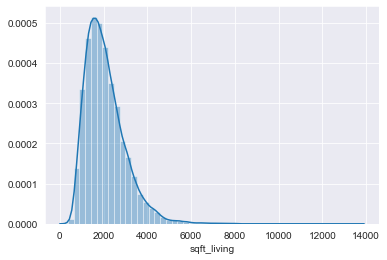

In [32]:

sns.distplot(kc_house_df['sqft_living'])

The sqft_living column (square footage home) seems normally distributed.

<AxesSubplot:xlabel='sqft_lot'>

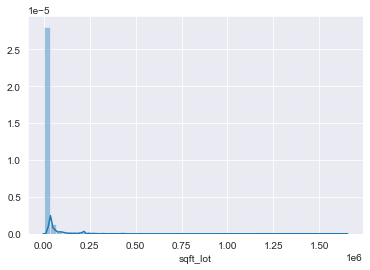

In [33]:
sns.distplot(kc_house_df['sqft_lot'])

In [34]:
# Definitely crazy outliers here. Gotta deal with them

<AxesSubplot:xlabel='zipcode'>

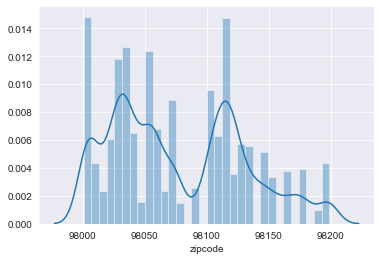

In [35]:
sns.distplot(kc_house_df['zipcode'])

In [36]:
# Can i use a distplot for zipcode? central limit theorem?
# generate a map using zipcode

<AxesSubplot:xlabel='sqft_above'>

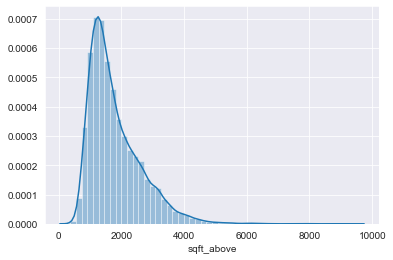

In [37]:
sns.distplot(kc_house_df['sqft_above'])
# Positive skewness

<AxesSubplot:xlabel='condition'>

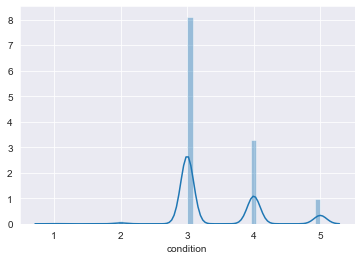

In [38]:
sns.distplot(kc_house_df['condition'])

<AxesSubplot:xlabel='price'>

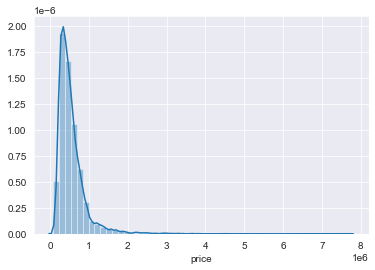

In [39]:
sns.distplot(kc_house_df['price'])

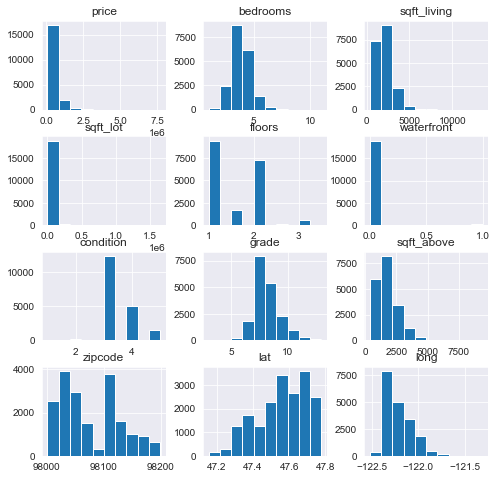

In [40]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
kc_house_df.hist(ax = ax);

***
## Let's deal with the outliers

In [41]:
# Do i normalize first then deal with outliers?
# Not sure if I should use Z-score, or feature scaling and normailzation

In [ ]:
df = df.drop(df.loc[df['price'] > np.mean(df['price']) + (2 * np.std(df['price']))].index)

***
## Looking at correlation

In [43]:
kc_house_df.corr()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,zipcode,lat,long
price,1.000000,0.317152,0.704441,0.087433,0.258815,0.270984,0.037486,0.667733,0.609638,-0.050198,0.306367,0.021726
bedrooms,0.317152,1.000000,0.594821,0.030886,0.188513,-0.004046,0.021561,0.370531,0.495244,-0.156609,-0.012996,0.136962
sqft_living,0.704441,0.594821,1.000000,0.173620,0.356924,0.107415,-0.057649,0.763697,0.877670,-0.196227,0.054237,0.239775
sqft_lot,0.087433,0.030886,0.173620,1.000000,-0.007530,0.023163,-0.013630,0.114962,0.184376,-0.130022,-0.085342,0.229882
floors,0.258815,0.188513,0.356924,-0.007530,1.000000,0.021395,-0.263350,0.458217,0.525019,-0.058251,0.051600,0.127155
waterfront,0.270984,-0.004046,0.107415,0.023163,0.021395,1.000000,0.017189,0.085643,0.073498,0.031658,-0.012907,-0.040102
condition,0.037486,0.021561,-0.057649,-0.013630,-0.263350,0.017189,1.000000,-0.144850,-0.155834,0.000495,-0.018885,-0.105123
grade,0.667733,0.370531,0.763697,0.114962,0.458217,0.085643,-0.144850,1.000000,0.757402,-0.184241,0.115897,0.199057
sqft_above,0.609638,0.495244,0.877670,0.184376,0.525019,0.073498,-0.155834,0.757402,1.000000,-0.258263,0.003437,0.342573
zipcode,-0.050198,-0.156609,-0.196227,-0.130022,-0.058251,0.031658,0.000495,-0.184241,-0.258263,1.000000,0.271753,-0.562513


Use the correlation method .corr() to determine the relationship/association of between the currenct columns

* **If two variables have a correlation of +0.9**: the change in one item results in a similar change to another item
* **If two variables have a correlation of -0.9**: the change in one variable results in an opposite change in the other variable.
* **If two variables have a correlation near 0**: there would be no effect

In [ ]:
# Gonna separate columns into continuaous and categorical values
continuous = ['price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'sqft_above']
categorical = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade', 'zipcode']

In [ ]:
cont_corr = kc_house_df[continuous].corr()
cont_corr

In [ ]:
sns.heatmap(cont_corr, annot=True, cmap="coolwarm")

In [ ]:
cat_corr = kc_house_df[categorical].corr()
cat_corr

In [ ]:
sns.heatmap(cat_corr, annot=True, cmap='coolwarm')